<a href="https://colab.research.google.com/github/chho-work/syntheticReplica/blob/main/sample_nbs/Sample_nb_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Introduction
This notebook demonstrate how to use custom classes, methods and utilities functions to create synthetic images.  

Synthetic images are usually the combination of two images, a smaller foreground image(s) pasted on a second, but bigger, background image.  The tools in this notebook allows the users to create and select a range of coordinates.  These coordinates has as purpose of aiding the user to establish the location(s) of foreground images on top of a background image. 

The example used in this notebook are mostly images of "antibiograms".

Basic functionalities:
* Print file names of a specific directory.  Remove non-image files and sub-directory.

* Display images in Grid and TarBar layouts.

* Preview in the background image, the possible spots to paste the foreground images.  Create and draw a collection of coordinates in the background image in order to aid the selection of the best locations to attach foreground images.     

### Setup

In [1]:
# Clone imageReplica repo, which contains all the necessary images for demo in this notebook.
!git clone https://github.com/chho-work/syntheticReplica.git

Cloning into 'syntheticReplica'...
remote: Enumerating objects: 52, done.
remote: Counting objects: 100% (52/52), done.
remote: Compressing objects: 100% (34/34), done.
remote: Total 590 (delta 29), reused 33 (delta 16), pack-reused 538
Receiving objects: 100% (590/590), 176.02 MiB | 37.00 MiB/s, done.
Resolving deltas: 100% (328/328), done.


In [2]:
# Change to imageReplica directory and list its contents.
%cd /content/syntheticReplica
!ls

/content/syntheticReplica
00_core.ipynb		      assets	       MANIFEST.in
01_utils.ipynb		      CONTRIBUTING.md  README.md
02_display.ipynb	      docs	       sample_nbs
03_dirView.ipynb	      images	       settings.ini
04_generate_coordinate.ipynb  index.ipynb      setup.py
05_imageTools.ipynb	      LICENSE	       syntheticReplica
06_toolsCOCO.ipynb	      Makefile


### Import Library

In [3]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt 
%matplotlib inline 

from pathlib import Path
from syntheticReplica.dirView import *
from syntheticReplica.display import *
from syntheticReplica.core import *
from syntheticReplica.utils import *

### Create Paths to Data

In [4]:
# base path
base = Path('/content/syntheticReplica/images')

# path to background_images directory 
back = base.joinpath('background_images')

# path to synthetic_images directory
sample_img = base.joinpath('sample')

### List Directory and Remove Files

**Show File Information on a Specific Directory**: 









See examples of usage in the next cells.

In [5]:
showDirInf(sample_img, suffix_list= ['.jpg', '.jpeg', '.png'])

0: Not a JPG or PNG, please remove before proceeding -> sample.json
1: Not a JPG or PNG, please remove before proceeding -> sample_1.txt
2: Not a JPG or PNG, please remove before proceeding -> sample_2.txt
3: synthetic_sample_1.jpg
4: synthetic_sample_2.jpg
5: synthetic_sample_3.jpg
6: synthetic_sample_4.jpg
7: synthetic_sample_5.jpg
8: synthetic_sample_CT25.png

Path to files: "/content/syntheticReplica/images/sample"
Total number of items found: 9
Not a JPG or PNG files: 3


### Reproducing ".ipynb_checkpoints"
1. Open the left panel in Colab and goto "Files".  Create a "/test" folder by right clicking on the "/syntheticReplica/images/sample" directory and select "New folder".  By creating a folder manually, Colab automatically generates an "/.ipynb_checkpoints" folder.<br>

2. By calling "showDirInf( )" again, it will show the new folder "/test" and "/.ipynb_checkpoints". We can use rmDir( ) to remove both folders and rmFile( ) to remove ".txt" files.


In [7]:
showDirInf(sample_img, suffix_list= ['.jpg', '.jpeg', '.png'])

0: Not a JPG or PNG, please remove before proceeding -> .ipynb_checkpoints
1: Not a JPG or PNG, please remove before proceeding -> sample.json
2: Not a JPG or PNG, please remove before proceeding -> sample_1.txt
3: Not a JPG or PNG, please remove before proceeding -> sample_2.txt
4: synthetic_sample_1.jpg
5: synthetic_sample_2.jpg
6: synthetic_sample_3.jpg
7: synthetic_sample_4.jpg
8: synthetic_sample_5.jpg
9: synthetic_sample_CT25.png
10: Not a JPG or PNG, please remove before proceeding -> test

Path to files: "/content/syntheticReplica/images/sample"
Total number of items found: 11
Not a JPG or PNG files: 5


### Remove Folders and Files

In [8]:
# Let remove the following files or folders: test_dir, ipynb_checkpointts, sample.json, and 
#  any .txt format files.

# Remove test dir
rmDir(sample_img, 'test')

# Remove "".ipynb_checkpoints"
rmDir(sample_img, '.ipynb_checkpoints')

# Remove "sample.json" using index
rmFile([0], sample_img)

# Remove all files with extension ".txt"
rmFileExt(sample_img, '.txt')

"/content/syntheticReplica/images/sample/test"" removed
"/content/syntheticReplica/images/sample/.ipynb_checkpoints"" removed
"/content/syntheticReplica/images/sample/sample_1.txt"" removed!
"/content/syntheticReplica/images/sample/sample_2.txt"" removed!
All ".txt" removed!


In [9]:
# View directory again, all non-image files removed.
showDirInf(sample_img, suffix_list= ['.jpg', '.jpeg', '.png'])

0: synthetic_sample_1.jpg
1: synthetic_sample_2.jpg
2: synthetic_sample_3.jpg
3: synthetic_sample_4.jpg
4: synthetic_sample_5.jpg
5: synthetic_sample_CT25.png

Path to files: "/content/syntheticReplica/images/sample"
Total number of items found: 6
All images are ready to display, please proceed!


### Visualize Images


#### Images in TarBar Layout



In [10]:
# Select different images using the tarbar at the left hand side of the image.
displayTarBarImage(sample_img, 0, 5, figsize=(5, 5))

#### Random Images in Grid Layout



In [11]:
displayGridRandom(sample_img, 6, 2, 3, figsize=(5, 5))

### Positioning Foreground Images 
 
As mentioned in the introductory note, a synthetic image is the combination of two images, a foreground(s) and a background. In this section, a sequence of coordinates(represented by lines) will be created and plotted in a background image. These coordinates and plots can aid the user to determine the best location(s) to paste the foreground image(s).

Before starting, we need to explain a little bit about some of the terms used in "antibiograms".  The following is related to the illustration in the next cell:  

* Letters A, B, C on the left image, these are the ["_antibiotic disks_"](https://en.wikipedia.org/wiki/Disk_diffusion_test).  In the illustration, we see only one letter. In real disks, however, usually contains 2-3 letters followed by 2-3 digits(digits are often printed under the letters) printed on top of the disk.       
* "_Antibiotic disks_" are placed in a ["_petri dish_"](https://en.wikipedia.org/wiki/Petri_dish).  "_Petri dish_" contains ["_agar_"](https://en.wikipedia.org/wiki/Agar_plate) as growth medium.
* On the right image, ["_zone of inhibition_"](https://en.wikipedia.org/wiki/Antibiotic_sensitivity_testing) is the bacteria growth zone, and it is depicted as white circle spot engulfing "_antibiotic disk_" C.

So, the key words that we need to know are:
1. "_antibiotic disks_"
2. "_petri dish_"
3. "_zone of inhibition_"<br>

The above are basically the 3 objects that we will be working with in our example.  We will paste "antibiotic disks" and "zone of inhibition" images on top of "petri dish" image. "_Zone of Inhibition_" and "_Antibiotic Disks_" are **_foreground_** images.  "_Petri Dish_" is a **_background_** image.<br>

Foreground images must be smaller in size than the background image for the process to make sense, we won't be able to see the smaller foreground if it is overlaid by the bigger background image.<br>   

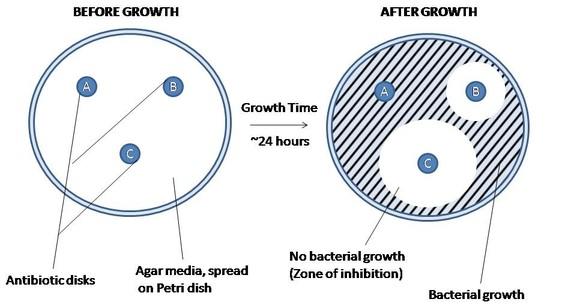

In [12]:
from IPython.display import Image
Image('/content/syntheticReplica/assets/antibiogram_explain_1.jpg')

**What's important when creating synthetic images?**

* Prior to attaching the foreground on top of a background image, we need to select a proper location.  The best way to to make this selection is to allow the user to visualize the possible spots where we can paste the foreground image(s).<br>

* Enable to select and seeing the locations can help us to avoid pasting two images in the same location, in another words, it can avoid overlapping the foreground images. Overlapping the foreground images will create unrealistic(faulty) synthetic images.<br>     

* In addition, in order to make the synthetic images to appear more realistic, it is important that the foreground images are pasted in the correct context.  For example, in our case, ZoI and ADs should be pasted inside the PD.  It would be unrealistic to paste ZoI and ADs outside of a PD.<br>


#### A Minimum Example

* Position the foreground images in the desired locations.
* Select and mark a location.
* Expand the boundaries of the location.

Let start with an example to show how it works:

**Steps**
1. Choose an image as the background image.
2. Name and select an initial point(x-y coordinate).
3. Select the number of coordinates to be created in the horizonta line(x-axis).
4. Select the number of coordinates to be created in the vertical line(y-axis).
5. Visualize the plot.
6. Repeat 1~5 if you want to add another point.

Annotations will be saved in file_csv. 

      init_pto_x init_pto_y expand_x expand_y
pto_0        250        350      300      200


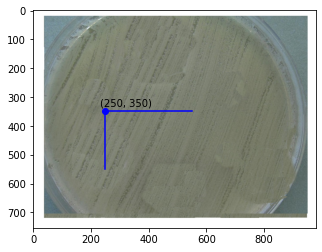

In [ ]:
# Path to annotation file.  In this file we save the created coordinates.
file_csv = '/content/annotDataFrame.csv'

# Background image file name.
back_img = 'empty_petri_9.jpg'

# Path to background image.
petri = back.joinpath(back_img)

# Create object
view = PreviewFore(sample_img, file_csv, petri)

# Name and select an initial point
index = "pto_0" # name
init_pto = [250, 350] # initial point

# The number of coordinates to be created in the x-axis
expand_x = 300

# The number of coordinates to be created in the y-axis
expand_y = 200

# Use adPto() method to plot an image for visualization
view.adPto(index, init_pto, expand_x, expand_y)

Explanation:
* The above is an image of an empty petri dish.
* We called our initial point, "pto_0".  We selected point x=250 and y=350, as coordinate for our initial point.  You can select any initial point as you like, as long as it is inside the petri dish. 
* The blue horizontal line plots the range of the coordinates in x-axis.  Changing the expand_x will change the size of horizontal line.   
* Similarly, the blue vertical line plots the range of coordinates in y-axis.  Changing the expand_y will change the vertical line size.
* The blue horizontal and vertical lines shows the different coordinates that we can select to attach our first foreground image.   
* Therefore, we can plot our foreground image in any of the following coordinates:
>[[250, 350], [251, 350], [252, 350],...,[550, 350]]<br>
[[250, 351], [250, 352], [250, 353],..., [250,550]] 
* In the "_notebook_2_demo.ipynb_", we will select randomly one of this coordinate to paste our foreground image.
* We will also expand the above process further by creating several new points and coordinates, and perform random selection to paste other foreground images.   

#### A Full Example



In [ ]:
file_csv = '/content/annotDataFrame.csv'
back_img = 'empty_petri_9.jpg'
petri = back.joinpath(back_img)
view_new = PreviewFore(sample_img, file_csv, petri)

I will add the following parameters to "_view_new_" object:<br>

Parameters Options:
1. 
index = "pto_0"
init_pto = [200, 200]
expand_x = 100
expand_y = 1
2. 
index = "pto_1"
init_pto = [350, 300]
expand_x = 1
expand_y = 100
3. 
index = "pto_2"
init_pto = [480, 450]
expand_x = 150 
expand_y = 100
4. 
index = "pto_3"
init_pto = [590, 650]
expand_x = 100
expand_y = 200


       init_pto_x  init_pto_y  expand_x  expand_y
pto_0         200         200       100         1
pto_1         350         300         1       100
pto_2         480         450       150       100
pto_3         590         650       100       200


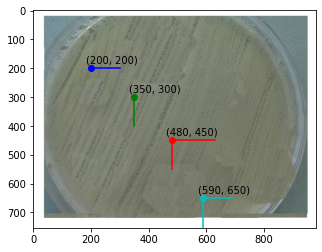

In [ ]:
# Use this same cell to add the above parameters.
# Change the values of index, init_pto, expand_x, expand_y and execute this cell.
# Add the next parameter by changing the values of index, init_pto, expand_x, expand_y and execute this cell again.
index = "pto_3" 
init_pto = [590, 650] 
expand_x = 100 
expand_y = 200

view_new.adPto(index, init_pto, expand_x, expand_y)

To remove any of the points in the image, use obj.rmPto( ) method.

       init_pto_x  init_pto_y  expand_x  expand_y
pto_0         200         200       100         1
pto_1         350         300         1       100
pto_2         480         450       150       100


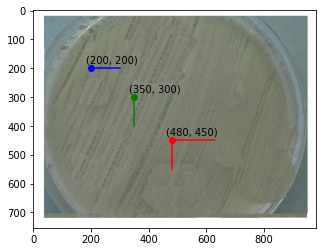

In [ ]:
view_new.rmPto("pto_3")

**Please continue this demo in sample_nb_2.ipynb. Thank you!**